In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [4]:
release_dates = pd.read_csv('data/release_dates.csv',
                                      parse_dates=['date'], infer_datetime_format=True)
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


In [16]:
month_dict = {'idx': [1,2,3,4,5,6,7,8,9,10,11,12],
              'label': ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']}
month_df = pd.DataFrame(month_dict).set_index('idx')

day_dict = {'idx': [0,1,2,3,4,5,6],
           'label': ['Sunday', 'Monday', 'Tuesday', 'Wednusday', 'Thrusday', 'Friday', 'Saturday']}
day_df = pd.DataFrame(data= day_dict).set_index('idx')

### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

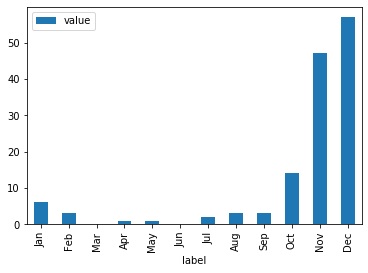

In [6]:
h = release_dates[(release_dates.title.str.contains('Christmas', case=False)) & (release_dates.country == 'USA')]
h = h.groupby(by = h.date.dt.month).size()
result = pd.concat([h.rename('value'),month_df], axis = 1).fillna(0)
result = result.set_index(result['label'])
result.plot(kind='bar')

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

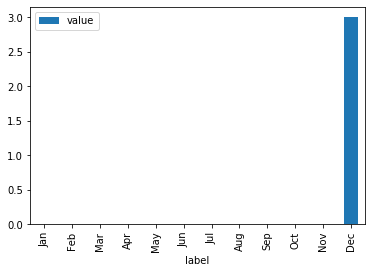

In [7]:
h = release_dates[(release_dates.title.str.contains('The Hobbit', case=False)) & (release_dates.country == 'USA')]
h = h.groupby(by = h.date.dt.month).size()
result = pd.concat([h.rename('value'),month_df], axis = 1).fillna(0)
result = result.set_index(result['label'])
result.plot(kind='bar')

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

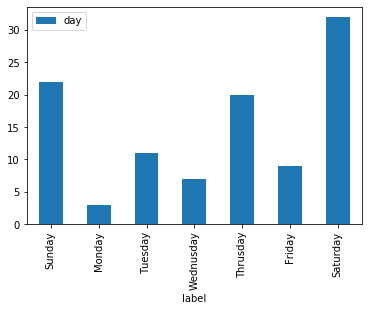

In [27]:
h = release_dates[(release_dates.title.str.contains('romance', case=False)) & (release_dates.country == 'USA')]
h = h.date.dt.dayofweek.value_counts().sort_index()
h = pd.concat([h.rename('day'), day_df], axis = 1)
h.set_index('label').plot(kind='bar')

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

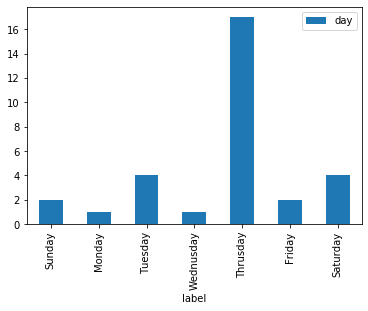

In [29]:
h = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]
h = h.date.dt.dayofweek.value_counts().sort_index()
h = pd.concat([h.rename('day'), day_df], axis = 1)
h.set_index('label').plot(kind='bar')

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [75]:
c = cast[(cast.name == 'Judi Dench') & (cast.year // 10 == 199)]
r = release_dates[release_dates.country == 'USA']
c.merge(r, on=['title','year']).sort_values('date')

,title,year,name,type,character,n,country,date
0,GoldenEye,1995,Judi Dench,actress,M,6.0,USA,1995-11-17
2,Jack & Sarah,1995,Judi Dench,actress,Margaret,3.0,USA,1996-03-22
1,Hamlet,1996,Judi Dench,actress,Hecuba,12.0,USA,1996-12-25
3,Mrs Brown,1997,Judi Dench,actress,Queen Victoria,1.0,USA,1997-10-03
7,Tomorrow Never Dies,1997,Judi Dench,actress,M,9.0,USA,1997-12-19
4,Shakespeare in Love,1998,Judi Dench,actress,Queen Elizabeth,12.0,USA,1999-01-08
5,Tea with Mussolini,1999,Judi Dench,actress,Arabella,2.0,USA,1999-05-14
6,The World Is Not Enough,1999,Judi Dench,actress,M,6.0,USA,1999-11-19


### In which months do films with Judi Dench tend to be released in the USA?

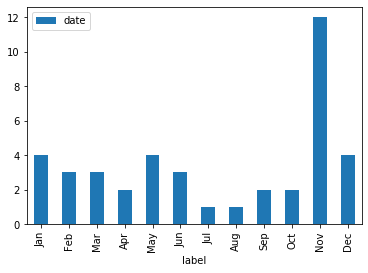

In [84]:
c = cast[(cast.name == 'Judi Dench')]
r = release_dates[release_dates.country == 'USA']
result = c.merge(r, on=['title','year']).date.dt.month.value_counts()
pd.concat([result, month_df], axis = 1).set_index('label').plot(kind='bar')

### In which months do films with Tom Cruise tend to be released in the USA?

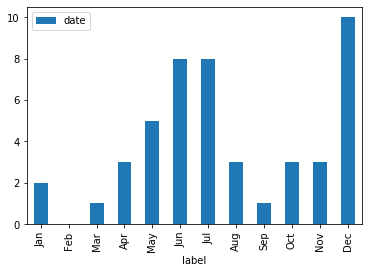

In [94]:
c = cast[cast.name == 'Tom Cruise']
r = release_dates[release_dates.country == 'USA']
result = c.merge(r, on=['title','year'])
result = result.date.dt.month.value_counts()
pd.concat([result, month_df], axis = 1).set_index('label').fillna(0).plot(kind='bar')